
# Part 1 – Power Law Transformation (Gamma Correction)

In [1]:
pip install opencv-python "numpy<2" matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
print(cv2.__version__)

4.11.0


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

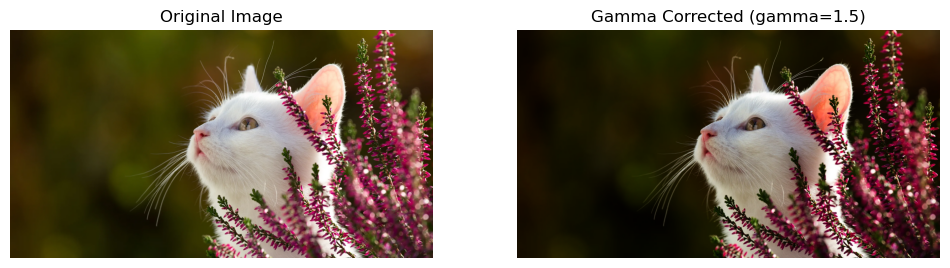

In [27]:
def gamma_correction(image, gamma):
    normalized_img = image / 255.0
    
    gamma_img = np.power(normalized_img, gamma)
    
    result = np.uint8(gamma_img * 255)
    
    return result

img = cv2.imread('/Users/230104/Downloads/catjpeg.webp')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

corrected_1_1 = gamma_correction(img_rgb, 1.5)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(corrected_1_1)
plt.title("Gamma Corrected (gamma=1.5)")
plt.axis('off')
plt.show()


### Challenge 1.2 – Gamma Curve Analysis


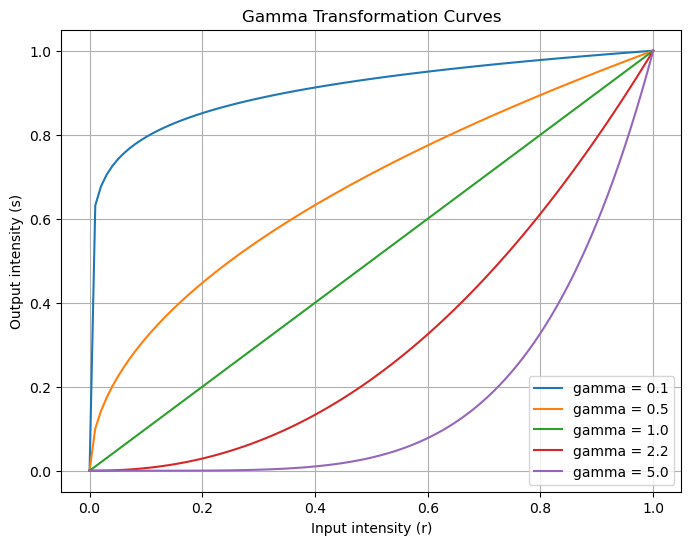

In [38]:
r = np.linspace(0, 1, 100)

gamma_values = [0.1, 0.5, 1.0, 2.2, 5.0]

plt.figure(figsize=(8, 6))

for g in gamma_values:
    s = np.power(r, g)
    plt.plot(r, s, label=f'gamma = {g}')

plt.title("Gamma Transformation Curves")
plt.xlabel("Input intensity (r)")
plt.ylabel("Output intensity (s)")
plt.legend()
plt.grid(True)
plt.show()


### Challenge 1.3 – Comparative Study

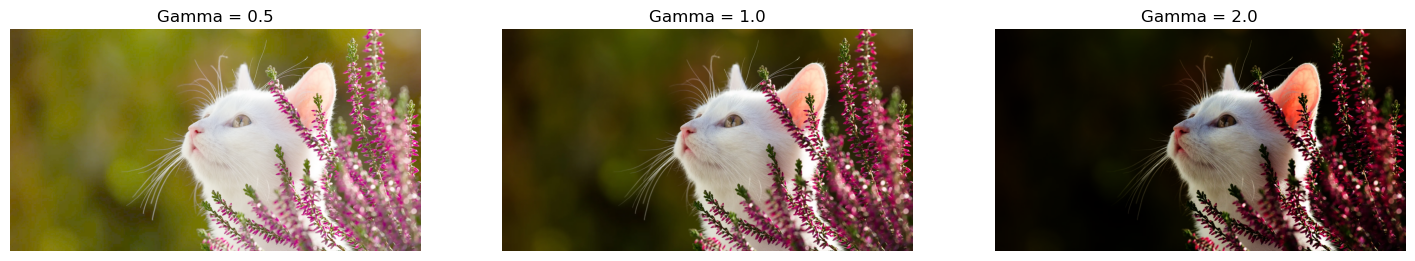

In [34]:
gammas_to_test = [0.5, 1.0, 2.0]

plt.figure(figsize=(18, 6))

for i, g in enumerate(gammas_to_test):
    res = gamma_correction(img_rgb, g)
    plt.subplot(1, 3, i+1)
    plt.imshow(res)
    plt.title(f"Gamma = {g}")
    plt.axis('off')

plt.show()


# Part 2 – Basic Intensity Transformations

### Challenge 2.1 – Image Negative


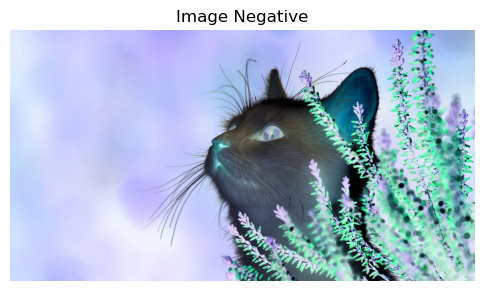

In [35]:
def image_negative(image):
    negative_img = 255 - image
    return negative_img

neg_res = image_negative(img_rgb)
plt.figure(figsize=(6, 6))
plt.imshow(neg_res)
plt.title("Image Negative")
plt.axis('off')
plt.show()



### Challenge 2.2 – Intensity Range Mapping



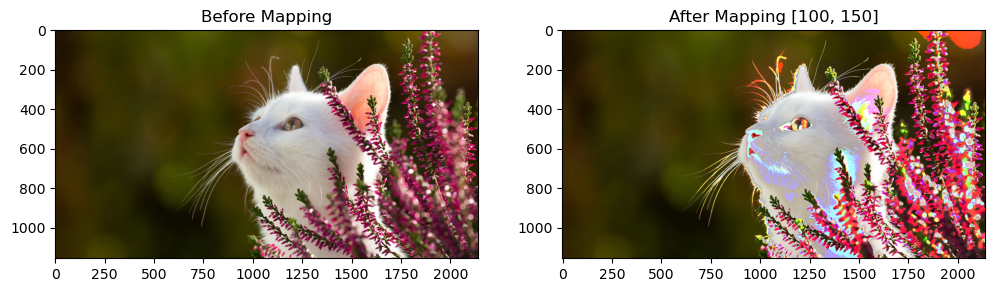

In [36]:
def intensity_range_mapping(image, A, B):
    res = image.copy()
    
    mask = (res >= A) & (res <= B)
    res[mask] = 255
    return res

mapped_res = intensity_range_mapping(img_rgb, 100, 150)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1); plt.imshow(img_rgb); plt.title("Before Mapping")
plt.subplot(1, 2, 2); plt.imshow(mapped_res); plt.title("After Mapping [100, 150]")
plt.show()



### Challenge 2.3 – Integrated Enhancement



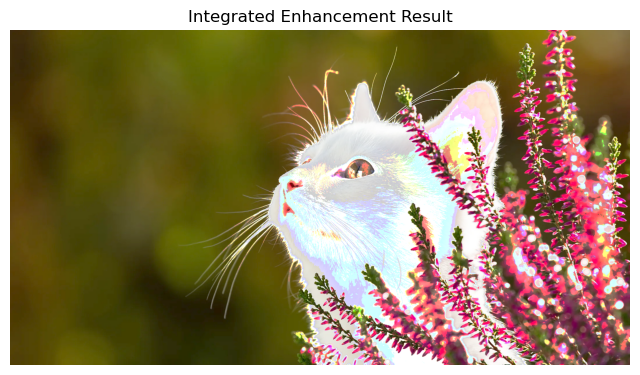

In [25]:
input_img = cv2.imread('/Users/230104/Downloads/catjpeg.webp')
rgb_input = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

gamma_step = gamma_correction(rgb_input, 0.7)

final_step = intensity_range_mapping(gamma_step, 150, 200)

plt.figure(figsize=(8, 8))
plt.imshow(final_step)
plt.title("Integrated Enhancement Result")
plt.axis('off')
plt.show()



# Part 3 – Advanced Optimization Challenge

### Challenge 3.1 – Performance & Robustness


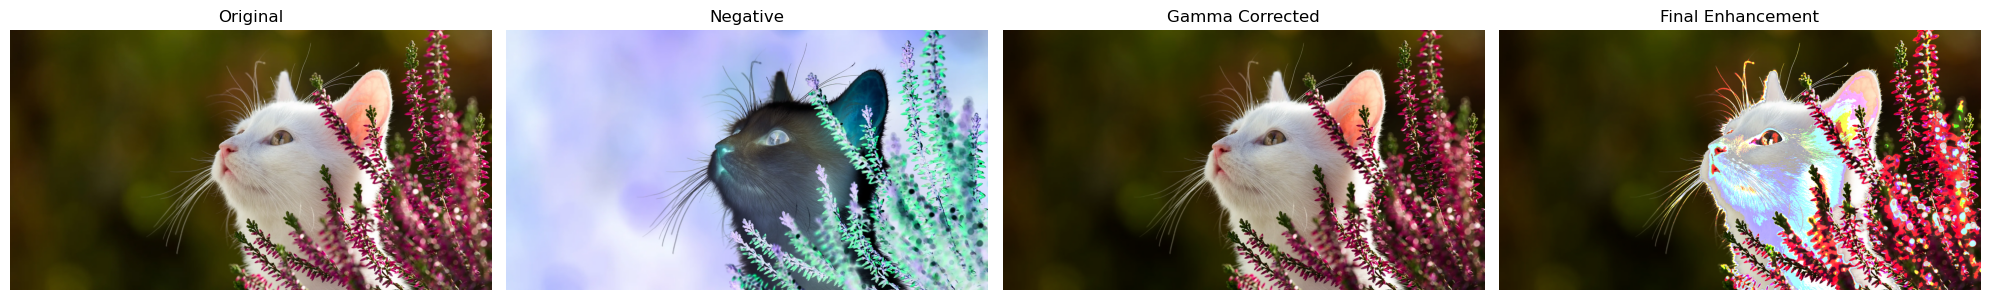

In [37]:
def optimized_processor(image_path, gamma=1.0, map_range=None):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError("Image path is invalid.")
    
    
    if len(img.shape) == 3:
        img_work = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_work = img

    lut = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    gamma_img = cv2.LUT(img_work, lut)

    negative_img = 255 - img_work

    enhanced_img = gamma_img.copy()
    if map_range:
        A, B = map_range
        enhanced_img[(enhanced_img >= A) & (enhanced_img <= B)] = 255

    plt.figure(figsize=(20, 10))
    titles = ['Original', 'Negative', 'Gamma Corrected', 'Final Enhancement']
    outputs = [img_work, negative_img, gamma_img, enhanced_img]

    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.imshow(outputs[i], cmap='gray' if len(outputs[i].shape)==2 else None)
        plt.title(titles[i])
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

optimized_processor('/Users/230104/Downloads/catjpeg.webp', gamma=1.2, map_range=(100, 160))